## Laboratorium 6

### 0. Przykładowe dane 

In [26]:
using Plots
using Polynomials
using DataFrames
using Statistics
using Interpolations

In [4]:
# wylosowanie węzłów interpolacji
xs = 1:1:10
A = [rand() for x in xs]
# gęste punkty do rysowania wykresów funkcji interpolujacych
xsf = 1:0.02:10

1.0:0.02:10.0

In [5]:
p0 = scatter(xs, A, label="data points")
savefig(p0, "img/plot0.pdf")

### 1. Wielomian Interpolacyjny Lagrange’a

$L_k(x) = \prod_{i=0, i \neq k}^{n} \frac{x - x_i}{x_k - x_i} \qquad
P_n(x) = \sum_{k=0}^{n} L_k(x)f(x_k) $

In [6]:
function lagrange_interpolation(xs, A)   
    n = size(A,1)
    P = Poly([0])
    for k = 1:n
        l = Poly([1.0])
        for i = 1:n
            if i != k
                l = l * poly([xs[i]]) / (xs[k] - xs[i])
            end
        end            
        P += (l * A[k])
    end
    return P
end

lagrange_interpolation (generic function with 1 method)

In [12]:
fit1 = lagrange_interpolation(xs, A)
B1 = [fit1(x) for x in xsf]
p1 = scatter(xs, A, label="data points")
plot!(xsf, B1, label="lagrange interpolation")
savefig(p1, "img/plot1.pdf")

### 2. Metoda Newtona (ilorazów róznicowych)
$P_n(x) = a_0 + a_1(x - x_0) + a_2(x - x_0)(x - x_1) + ... + a_n(x - x_0) \cdots (x - x_{n-1})$

In [8]:
function newton_interpolation(xs, A, n)
    if n == 1
        Poly(float(A[1]))
    else
        prev = newton_interpolation(xs, A, n-1)
        p = A[n] - polyval(prev, xs[n])
        q = 1
        for i = 1:n-1
            q = q * (xs[n] - xs[i])
        end        
        poly([xs[i] for i in 1:n-1]) * (p / q) + prev
    end
end

newton_interpolation (generic function with 1 method)

In [13]:
fit2 = newton_interpolation(xs, A, size(A,1))
B2 = [fit2(x) for x in xsf]
p2 = scatter(xs, A, label="data points")
plot!(xsf, B2, color=:orange, label="newton interpolation")
savefig(p2, "img/plot2.pdf")

### 3. Pakiet Polynomials 

In [14]:
# interpolacja wielomianowa w pakiecie Polynomials
fit3 = polyfit(xs, A)
B3 = [fit3(x) for x in xsf]
p3 = scatter(xs, A, label="data points")
plot!(xsf, B1, color=:red, label="lagrange interpolation")
plot!(xsf, B2, color=:orange, label="newton interpolation")
plot!(xsf, B3, color=:green, label="polyfit interpolation")
savefig(p3, "img/plot3.pdf")

Niezależnie od zastosowanej metody, dla danych węzłów interpolacji wyznaczany jest ten sam wielomian.
Dlaczego? Otóż dla n+1 punktów istnieje _dokładnie_ jeden wielomian n-tego stopnia interpolujący te punkty.

### 4. Porównanie metod

In [36]:
df = DataFrame(size = Int64[], method = String[], time = Float64[])

for r in 100:50:500
    x = 0:1:r
    for i in 1:10
        y = rand(Int, r+1)
        push!(df, [r, "lagrange",@elapsed lagrange_interpolation(x, y)])        
        push!(df, [r, "newton",  @elapsed newton_interpolation(x, y, r)])
        push!(df, [r, "polyfit", @elapsed polyfit(x, y)])
    end
end

In [37]:
dfm = by(df, [1,2]) do grouped
    DataFrame(time_mean = mean(grouped[3]), time_std = std(grouped[3]))
end

,size,method,time_mean,time_std
,Int64,String,Float64,Float64
1,100,lagrange,0.0949119,0.0485013
2,100,newton,0.00892413,0.0265571
3,100,polyfit,0.0194624,0.0376842
4,150,lagrange,0.19618,0.00806947
5,150,newton,0.00121963,5.79717e-5
6,150,polyfit,0.00326138,0.0010196
7,200,lagrange,0.231628,0.0265957
8,200,newton,0.00274612,0.000646577
9,200,polyfit,0.0198509,0.0169455


In [38]:
p4 = scatter(dfm[:size], dfm[:time_mean], group = dfm[:method],
    yerr = dfm[:time_std], xlabel = "size", ylabel = "time mean [s]",
    dpi = 120, size = (600,500), legend = :topleft)
savefig(p4, "img/plot4.pdf")

### 5. Interpolacja funkcjami sklejanymi 

In [31]:
#interpolacja szescienna 
cubic = CubicSplineInterpolation(xs, A)
#interpolacja BSpline'ami
bspline = interpolate(A, BSpline(Linear()))

B5 = [cubic(x) for x in xsf]
B5b = [bspline(x) for x in xsf]
p5 = scatter(xs, A, label="data points", legend=:topright)
plot!(xsf, B5, color=:violet, label="cubic spline interpolation")
plot!(xsf, B5b, color=:orange, label="bspline linear interpolation")
plot!(xsf, B2, color=:grey, label="newton interpolation")
savefig(p5, "img/plot5.pdf")

### 6. Efekt Rungego 

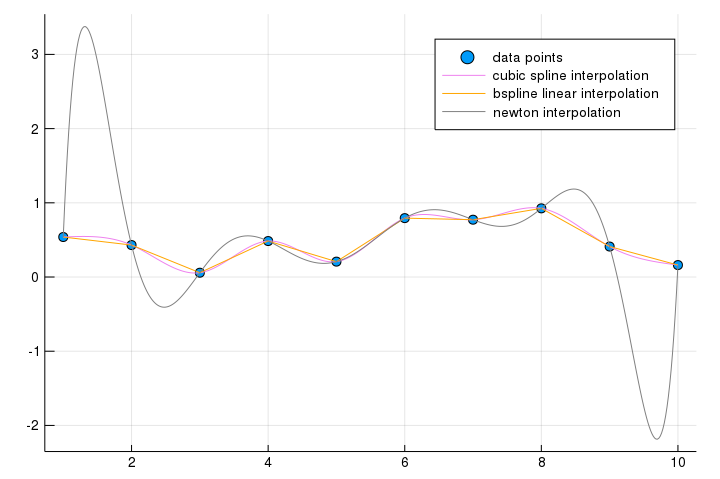

In [35]:
plot!(dpi = 120, size = (600,400), fmt = :png)